# Comparison of estimation algorithms

In [4]:
%pylab inline
import pandas as pd
import numpy as np

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")



Populating the interactive namespace from numpy and matplotlib


In [5]:
dfnaive = pd.read_csv('data/naivescores2019-01-03T1641.csv')
dfexpress = pd.read_csv('data/expressscores2019-01-03T1641.csv')
dfweb3 = pd.read_csv('data/web3jscores2019-01-03T1641.csv')

In [18]:
dfnaive = dfnaive.replace(-1.00, np.nan)
dfnaive = dfnaive.sort_values(by=['block_number']) 

dfexpress = dfexpress.replace(-1.00, np.nan)
dfexpress = dfexpress.sort_values(by=['block_number']) 

dfweb3 = dfweb3.replace(-1.00, np.nan)
dfweb3 = dfweb3.sort_values(by=['block_number']) 

def stats(df):
    df['priceGwei'] = df['priceStandard'].apply(lambda x: x/1e9)
    avg_percentage1 = df["scoreStandardPlus1"].mean()
    avg_gasprice = df["priceGwei"].mean()
    std_percentage1 = df["scoreStandardPlus1"].std()
    std_gasprice = df["priceGwei"].std()
    min_gasprice = df["priceGwei"].min()
    max_gasprice = df["priceGwei"].max()
    print("min price: " + str(min_gasprice))
    print("max price: " + str(max_gasprice))
    print("The average gas price is: " + str(avg_gasprice) + " GWei. std: " + str(std_gasprice))
    print("On average " +  str(avg_percentage1) +"% of the transactions of the next block had a higher gas price. std: " + str(std_percentage1))

def statsFast(df):
    df['priceGwei'] = df['priceFast'].apply(lambda x: x/1e9)
    avg_percentage1 = df["scoreFastPlus1"].mean()
    avg_gasprice = df["priceGwei"].mean()
    std_percentage1 = df["scoreFastPlus1"].std()
    std_gasprice = df["priceGwei"].std()
    min_gasprice = df["priceGwei"].min()
    max_gasprice = df["priceGwei"].max()
    print("min price: " + str(min_gasprice))
    print("max price: " + str(max_gasprice))
    print("The average gas price is: " + str(avg_gasprice) + " GWei. std: " + str(std_gasprice))
    print("On average " +  str(avg_percentage1) +"% of the transactions of the next block had a higher gas price. std: " + str(std_percentage1))
print("\n############### naive ###################")
stats(dfnaive)

print("\n############### express ###################")
stats(dfexpress)

print("\n############### web3 ###################")
statsFast(dfweb3)



############### naive ###################
min price: 2.0
max price: 11.0
The average gas price is: 4.247490648328032 GWei. std: 2.3065578222561998
On average 70.39942629482073% of the transactions of the next block had a higher gas price. std: 28.64795139501747

############### express ###################
min price: 3.0
max price: 3.0
The average gas price is: 3.0 GWei. std: 0.0
On average 76.21570196078432% of the transactions of the next block had a higher gas price. std: 26.478479464127393

############### web3 ###################
min price: 2.031892013
max price: 9.0
The average gas price is: 3.543043615823182 GWei. std: 1.0279906579734468
On average 74.97753831041257% of the transactions of the next block had a higher gas price. std: 27.59941595812014


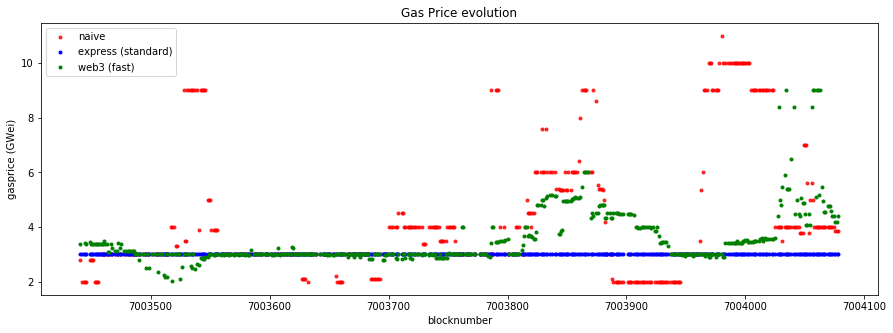

In [19]:
import matplotlib.pyplot as plt
    
x1 = dfnaive["block_number"].values
y1 = dfnaive["priceGwei"].values

x2 = dfexpress["block_number"].values
y2 = dfexpress["priceGwei"].values

x3 = dfweb3["block_number"].values
y3 = dfweb3["priceGwei"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(x1, y1, alpha=0.8, c='r', marker='.', label='naive')
ax.scatter(x2,y2, c='b', marker='.', label='express (standard)')
ax.scatter(x3,y3, c='g',marker='.', label='web3 (fast)')

plt.xlabel('blocknumber')
plt.ylabel('gasprice (GWei)')
plt.title('Gas Price evolution')
plt.legend(loc=2)

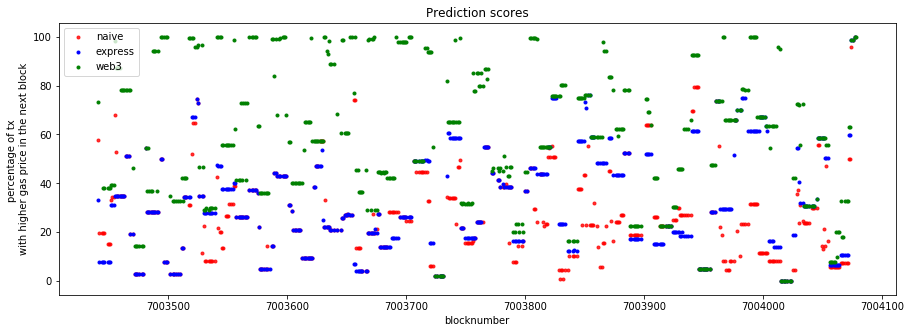

In [16]:
import matplotlib.pyplot as plt

dfnaive['nextMin'] = dfnaive[["scoreStandardPlus1", "scoreStandardPlus2", "scoreStandardPlus3", "scoreStandardPlus4", "scoreStandardPlus5", "scoreStandardPlus6", "scoreStandardPlus7", "scoreStandardPlus8", "scoreStandardPlus9", "scoreStandardPlus10"]].min(axis=1)
x1 = dfnaive["block_number"].values
y1 = dfnaive["nextMin"].values

dfexpress['nextMin'] = dfexpress[["scoreStandardPlus1", "scoreStandardPlus2", "scoreStandardPlus3", "scoreStandardPlus4", "scoreStandardPlus5", "scoreStandardPlus6", "scoreStandardPlus7", "scoreStandardPlus8", "scoreStandardPlus9", "scoreStandardPlus10"]].min(axis=1)
x2 = dfexpress["block_number"].values
y2 = dfexpress["nextMin"].values

dfweb3['nextMin'] = dfweb3[["scoreStandardPlus1", "scoreStandardPlus2", "scoreStandardPlus3", "scoreStandardPlus4", "scoreStandardPlus5", "scoreStandardPlus6", "scoreStandardPlus7", "scoreStandardPlus8", "scoreStandardPlus9", "scoreStandardPlus10"]].min(axis=1)
x3 = dfweb3["block_number"].values
y3 = dfweb3["nextMin"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(x1, y1, alpha=0.8, c='r', marker='.', label='naive')
ax.scatter(x2,y2, c='b', marker='.', label='express')
ax.scatter(x3,y3, c='g',marker='.', label='web3')

plt.xlabel('blocknumber')
plt.ylabel('percentage of tx \nwith higher gas price in the next block')
plt.title('Prediction scores')
plt.legend(loc=2)

In [22]:
naiveMean = dfnaive["priceGwei"].mean()
expressMean = dfexpress["priceGwei"].mean()
web3Mean = dfweb3["priceGwei"].mean()

toDollar = 146.31 / 1000000000 #1 ETH = 145.13, 3.01.2019 20:00
diff = naiveMean - expressMean
diff1 = naiveMean - web3Mean
print('{0:.10f}'.format(diff * toDollar) + "$")
print('{0:.10f}'.format(diff1 * toDollar) + "$")

print('express per tx: {0:.10f}'.format(diff * toDollar * 21000) + "$")
print('web3 per tx: {0:.10f}'.format(diff1 * toDollar * 21000) + "$")

0.0000001825$
0.0000001031$
express per tx: 0.0038329275$
web3 per tx: 0.0021644206$


on average over 500 blocks a total of 0.0000001810 dollar could be saved per 1 Gwei
using express estimation instead of naive estimation
for a standard transaction this would be (fee = gaslimit * gasprice)

21000 * 0.0000001810 = 0.0038 dollar

using web3 estimation instead of naive estimation
for a standard transaction this would be (fee = gaslimit * gasprice)

21000 * 0.0000004010 = 0.0084 dollar

this suggests that most users do not even rely on a naive estimation but just type in some value.

In [25]:
averageFeeNaive = naiveMean * 21000 * toDollar
averageFeeExpress= expressMean * 21000 * toDollar
averageFeeWeb3 = web3Mean * 21000 * toDollar
print('naive fee per tx: {0:.10f}'.format(averageFeeNaive) + "$")
print('express fee per tx: {0:.10f}'.format(averageFeeExpress) + "$")
print('web3 fee per tx: {0:.10f}'.format(averageFeeWeb3) + "$")

naive fee per tx: 0.0130504575$
express fee per tx: 0.0092175300$
web3 fee per tx: 0.0108860369$


In [2]:
def getPercentage(cols, df):
    minScore = df[cols].min(axis=1)
    numberOfBlocks = minScore.count()
    numberOfBlocksWithoutInclusion = minScore.value_counts().get(100.000, None)
    if numberOfBlocksWithoutInclusion is None:
        numberOfBlocksWithoutInclusion = 0
    percentage = (100 / numberOfBlocks) * numberOfBlocksWithoutInclusion
    print(percentage)
    return percentage

26.095617529880478
32.94117647058823
33.59528487229862
9.760956175298805
15.098039215686274
15.127701375245579
4.780876494023904
8.03921568627451
8.055009823182711
2.589641434262948
4.117647058823529
4.322200392927308
1.195219123505976
1.9607843137254901
2.5540275049115913
1.195219123505976
0.7843137254901961
1.1787819253438112
0.9960159362549801
0.39215686274509803
0.5893909626719056
0.597609561752988
0.19607843137254902
0.19646365422396855
0.398406374501992
0.19607843137254902
0.0
0.199203187250996
0.19607843137254902
0.0


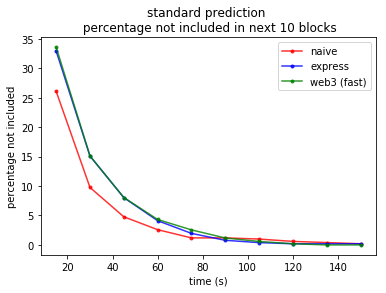

In [14]:
x1 = []
y1 = []
y2 = []
y3 = []

avg_blocktime = 15.0
cols = []
colsFast = []
for idx in range(1, 11, 1):
    cols.append("scoreStandardPlus" + str(idx))
    colsFast.append("scoreFastPlus" + str(idx))
    percentage1 = getPercentage(cols, dfnaive)
    y1.append(percentage1)
    x1.append(idx * avg_blocktime)
    percentage2 = getPercentage(cols, dfexpress)
    y2.append(percentage2)
    percentage3 = getPercentage(colsFast, dfweb3)
    y3.append(percentage3)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, y1, alpha=0.8, c='r', marker='.', label='naive')
ax.plot(x1, y2, alpha=0.8, c='b', marker='.', label='express')
ax.plot(x1, y3, alpha=0.8, c='g', marker='.', label='web3 (fast)')

plt.xlabel('time (s)')
plt.ylabel('percentage not included')
plt.title('standard prediction \n percentage not included in next 10 blocks')
plt.legend(loc=1)